In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sb

% matplotlib inline



# Data Exploration

In [7]:
header = ['fLength',
        'fWidth',
        'fSize',
        'fConc',
        'fConc1',
        'fAsym',
        'fM3Long',
        'fM3Trans',
        'fAlpha',
        'fDist',
        'class']

data = pd.read_csv("data.csv", skiprows=1, names =header)
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


**Attribute Information**:

1. **fLength**: continuous # major axis of ellipse [mm] 
2. **fWidth**: continuous # minor axis of ellipse [mm] 
3. **fSize**: continuous # 10-log of sum of content of all pixels [in #phot] 
4. **fConc**: continuous # ratio of sum of two highest pixels over fSize [ratio] 
5. **fConc1**: continuous # ratio of highest pixel over fSize [ratio] 
6. **fAsym**: continuous # distance from highest pixel to center, projected onto major axis [mm] 
7. **fM3Long**: continuous # 3rd root of third moment along major axis [mm] 
8. **fM3Trans**: continuous # 3rd root of third moment along minor axis [mm] 
9. **fAlpha**: continuous # angle of major axis with vector to origin [deg] 
10. **fDist**: continuous # distance from origin to center of ellipse [mm] 
11. **class**: g,h # gamma (signal), hadron (background) 

In [42]:
g = data[data['class'] == 'g']
h = data[data['class'] == 'h']

Data contains 19020 samples:
12332 of class 'g'
6688 of class 'h'


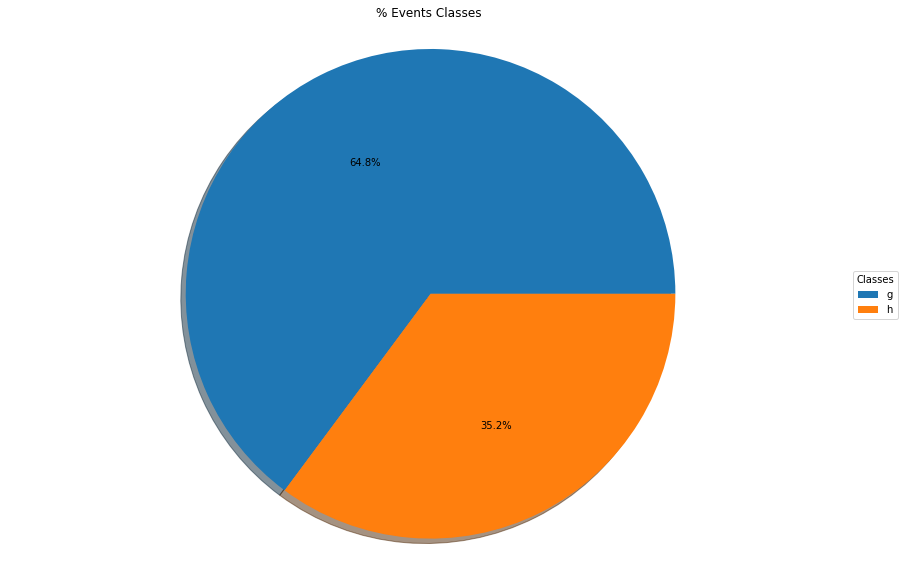

In [44]:
print("Data contains {} samples:\n{} of class 'g'\n{} of class 'h'".format(len(data), len(g), len(h)))
ser_data = pd.value_counts(data['class'])
labels = set(list(data['class']))
explode = (0,1,2,3,5,6,0,0)
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
wedges, texts, autotexts = ax.pie(ser_data, autopct='%1.1f%%',
        shadow=True)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.legend(wedges, labels,
          title="Classes",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("% Events Classes")
plt.show()

## Data Balancing

In [52]:
g_subset = g.sample(len(h))
g_subset.shape

(6688, 11)

In [65]:
indeces = sorted(list(g_subset.index) + list(h.index))
balanced_data = data.iloc[indeces]
print("balanced data contains {} samples:\n{} of class 'g'\n{} of class 'h'".format(len(balanced_data),
                                                                                    len(g_subset), len(h)))

balanced data contains 13376 samples:
6688 of class 'g'
6688 of class 'h'


In [66]:
features = balanced_data.drop(['class'], axis=1)
target = balanced_data['class']